In [1]:
import $file.scripts.importer

importer.loadProjectDependencies

import $file.$               



In [2]:
import scala.collection.JavaConverters._
import scala.collection.JavaConversions._
import edu.stanford.math.plex4._
import edu.stanford.math.plex4.api._
import edu.stanford.math.plex4.visualization._
import edu.stanford.math.plex4.homology.barcodes._
import edu.stanford.math.plex4.streams.impl.LazyWitnessStream

import breeze.numerics._
import breeze.linalg._
import breeze.math._
import breeze.stats.{mean, stddev}
import breeze.util.JavaArrayOps

import tda.persistence.Analysis._
import tda.persistence.Math._

implicit def mapEntryAsTuple[T,S](me: java.util.Map.Entry[T,S]): (T,S) = {
  (me.getKey(), me.getValue)
}

def drawBarcodes(images: Seq[java.awt.image.BufferedImage]) = {
  images foreach publish.png 
}

import scala.collection.JavaConverters._

import scala.collection.JavaConversions._

import edu.stanford.math.plex4._

import edu.stanford.math.plex4.api._

import edu.stanford.math.plex4.visualization._

import edu.stanford.math.plex4.homology.barcodes._

import edu.stanford.math.plex4.streams.impl.LazyWitnessStream


import breeze.numerics._

import breeze.linalg._

import breeze.math._

import breeze.stats.{mean, stddev}

import breeze.util.JavaArrayOps


import tda.persistence.Analysis._

import tda.persistence.Math._


defined function mapEntryAsTuple
defined function drawBarcodes

## Iris homology 


In [3]:
lazy val irisAllData = csvread(importer.loadData("iris.csv"))

lazy val irisData = irisAllData(::, Range(0,4))
lazy val irisTarget = irisAllData(::, 4).map(_.toInt)
lazy val irisDataNormalized = irisAllData

lazy val irisDist = dist(irisData, irisData)
lazy val irisArray = JavaArrayOps.dmDToArray2(irisData)

val irisMeanDist = mean(irisDist)
val irisMinDist = irisDist.toDenseVector.toArray.filter(_ > 0).min

Feb 05, 2017 11:40:20 PM com.github.fommil.jni.JniLoader liberalLoad
INFO: successfully loaded /tmp/jniloader1497116417923353124netlib-native_system-linux-x86_64.so


irisAllData: DenseMatrix[Double] = <lazy>
irisData: DenseMatrix[Double] = <lazy>
irisTarget: DenseVector[Int] = <lazy>
irisDataNormalized: DenseMatrix[Double] = <lazy>
irisDist: DenseMatrix[Double] = <lazy>
irisArray: Array[Array[Double]] = <lazy>
irisMeanDist: Double = 9.08494133333336
irisMinDist: Double = 0.009999999999990905

In [4]:
lazy val persistence = Plex4.getModularSimplicialAlgorithm(4, 2)
lazy val (maxDimension, maxFiltrationValue, numDivisions) = (4, 0.75, 25)
lazy val irisStream = Plex4.createVietorisRipsStream(irisArray, maxDimension, maxFiltrationValue, numDivisions)

persistence: homology.interfaces.AbstractPersistenceAlgorithm[homology.chain_basis.Simplex] = <lazy>
maxDimension: Int = <lazy>
maxFiltrationValue: Double = <lazy>
numDivisions: Int = <lazy>
irisStream: streams.impl.VietorisRipsStream[Array[Double]] = <lazy>

In [5]:
println(Seq(
  "Iris Stream for",
  s"maxFiltrationValue = ${maxFiltrationValue}",
  s"has ${irisStream.getSize()} simplices").mkString("\n"))

Iris Stream for
maxFiltrationValue = 0.75
has 289175 simplices


In [6]:
lazy val imgs = barcodeImages(
  irisStream,
  maxDimension,
  maxFiltrationValue,
  defaultPersistenceAlgorithm(maxDimension))

imgs: List[java.awt.image.BufferedImage] = <lazy>

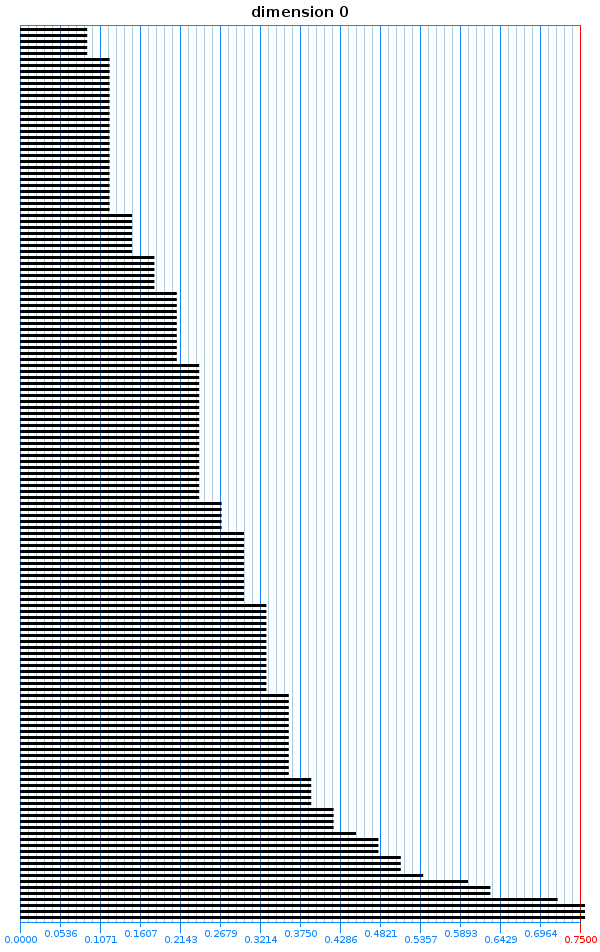

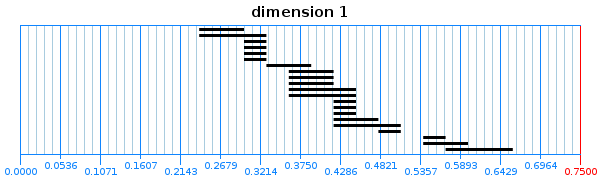

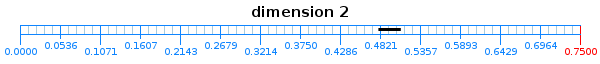

In [7]:
drawBarcodes(imgs)

## Iris homology with lazy witness stream

In [8]:
val noLandmarks = 50 
val landmarkSelector = Plex4.createMaxMinSelector(
  irisArray,
  noLandmarks)

landmarkSelector.getMaxDistanceFromPointsToLandmarks

lazy val lazyMaxFiltrationValue = 4 * landmarkSelector.getMaxDistanceFromPointsToLandmarks

noLandmarks: Int = 50
landmarkSelector: metric.landmark.MaxMinLandmarkSelector[Array[Double]] = edu.stanford.math.plex4.metric.landmark.MaxMinLandmarkSelector@51cc1c83
res7_2: Double = 0.4472135954999577
lazyMaxFiltrationValue: Double = <lazy>

In [8]:
val lazyWitnessStream = new LazyWitnessStream(
  landmarkSelector.getUnderlyingMetricSpace(),
  landmarkSelector,
  maxDimension,
  maxFiltrationValue,
  numDivisions)

lazyWitnesStream.finalizeStream()

cmd8.sc:8: not found: value lazyWitnesStream
val res8_1 = lazyWitnesStream.finalizeStream()
             ^

: 

In [8]:
println(Seq(
  "Iris Lazy Witness Stream for",
  s"maxFiltrationValue = ${lazyMaxFiltrationValue}",
  s"has ${lazyWitnesStream.getSize()} simplices").mkString("\n"))

cmd8.sc:4: not found: value lazyWitnesStream
  s"has ${lazyWitnesStream.getSize()} simplices").mkString("\n"))
          ^

: 

In [8]:
lazy val lazyImgs = barcodeImages(
  lazyWitnessStream,
  maxDimension,
  lazyMaxFiltrationValue,
  defaultPersistenceAlgorithm(maxDimension))

cmd8.sc:2: not found: value lazyWitnessStream
  lazyWitnessStream,
  ^

: 

In [8]:
drawBarcodes(lazyImgs)

cmd8.sc:1: not found: value lazyImgs
val res8 = drawBarcodes(lazyImgs)
                        ^

: 